# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here


import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
pd.set_option('display.max_columns', None)

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [4]:
# your answer here
temp = pd.read_csv('Temp_States.csv')

pd.DataFrame(temp)

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Print `temp`

In [5]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [6]:
# your answer here
temp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


#### Select the rows where state is New York

In [11]:
# your answer here
ny_rows = temp.loc[temp['State'] == 'New York']

for index, row in ny_rows.iterrows():

    print(row)





City                 NYC
State           New York
Temperature    19.444444
Name: 0, dtype: object
City             Albany
State          New York
Temperature    9.444444
Name: 1, dtype: object
City            Buffalo
State          New York
Temperature    3.333333
Name: 2, dtype: object


#### What is the average of the temperature of cities in New York?

In [13]:
# your answer here

ny_temps = temp.loc[temp['State'] == 'New York']

mean_temp = ny_temps['Temperature'].mean()

print(mean_temp)



10.74074074074074


#### We want to know cities and states with Temperature above 15 degress Celcius

In [14]:
# your answer here
above_degress = temp[temp['Temperature'] > 15]

print(above_degress[['City', 'State']])




       City        State
0       NYC     New York
3  Hartford  Connecticut
5    Treton   New Jersey
6    Newark   New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [16]:
# your answer here

below_degress = temp[temp['Temperature'] < 15]

print(below_degress[['City', 'State']])

         City        State
1      Albany     New York
2     Buffalo     New York
4  Bridgeport  Connecticut


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [17]:
# your answer here

between_15_20 = temp[(temp['Temperature'] > 15) & (temp['Temperature'] < 20)]

print(between_15_20['City'])



0         NYC
3    Hartford
Name: City, dtype: object


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [23]:
# your answer here

states = temp.groupby('State')['Temperature']

# Calculamos la media y la desviación estándar para cada estado utilizando la función agg()
states_grouped = states.agg(['mean', 'std'])

states_grouped

,mean,std
State,,
Connecticut,15.833333,1.964186
New Jersey,21.111111,1.571348
New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [24]:
# your answer here

employee = pd.read_csv('employee.csv')

pd.DataFrame(employee)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [25]:
# your answer here
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

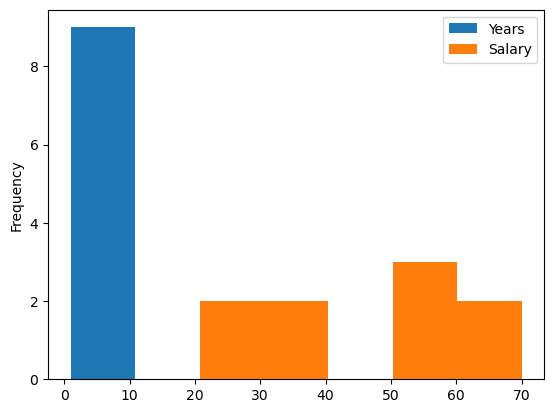

In [26]:
# your answer here

employee.plot.hist(bins=7);

#### What's the average salary in this company?

In [28]:
# your answer here

mean_salary = employee['Salary'].mean()

mean_salary

48.888888888888886

#### What's the highest salary?

In [30]:
# your answer here

max_salary = employee['Salary'].max()

max_salary

70

#### What's the lowest salary?

In [31]:
# your answer here

min_salary = employee['Salary'].min()

min_salary

30

#### Who are the employees with the lowest salary?

In [34]:
# your answer here

min_s_people = employee.groupby('Name')['Salary'].min()

employees_min_s = min_s_people[min_s_people == min_s_people.min()].index.tolist()

print(employees_min_s)


['David', 'Maria']


#### Could you give all the information about an employee called David?

In [38]:
# your answer here

employee.loc[employee['Name'] == 'David']



,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [37]:
# your answer here

employee.loc[employee['Name'] == 'David']['Salary']



2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [39]:
# your answer here

employee.loc[employee['Title'] == 'associate']


,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [40]:
# your answer here- 1 method

employee.head(3)


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [41]:
# your answer here- 2nd method
print(employee.iloc[:3])



    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


#### Find the employees who's title is associate and the salary above 55?

In [43]:
# your answer here

employee.loc[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]


,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [48]:
# your answer here

grouped_emp = employee.groupby('Years')['Salary'].mean()

grouped_emp




Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [46]:
# your answer here

grouped_title = employee.groupby('Title')['Salary'].mean()


grouped_title

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

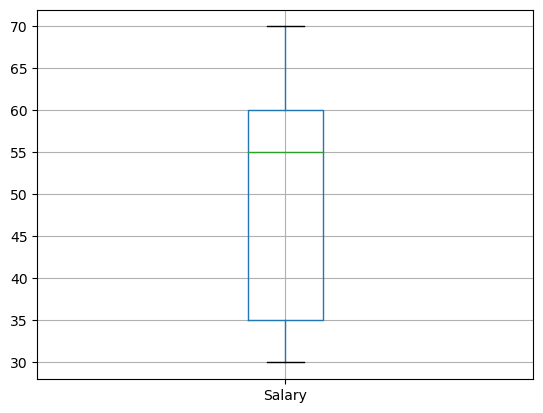

In [50]:
# draw boxplot here

import matplotlib.pyplot as plt

employee.boxplot(column=['Salary'])
plt.show()


In [53]:
# print first quartile here

Q1 = employee['Salary'].quantile(0.25)

Q1



35.0

In [55]:
# print third quartile here

Q3 = employee['Salary'].quantile(0.75)

Q3

60.0

#### Is the mean salary per gender different?

In [57]:
# your answer here


mean_gender = employee.groupby('Gender')['Salary'].mean()


mean_gender



Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [60]:
# your answer here

years_salary = ['Salary', 'Years', 'Department']

dept_ys = employee.groupby('Department')[years_salary].agg(['min', 'mean', 'max'])

print(dept_ys)


           Salary            Years              
              min   mean max   min      mean max
Department                                      
HR             30  45.00  70     2  4.666667   8
IT             30  48.75  70     1  4.500000   8
Sales          55  55.00  55     2  2.500000   3


In [58]:
employee.head(1)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [63]:
# your answer here

orders = pd.read_csv('C:/Users/FX506/5.1-lab-subsetting-and-descriptive-stats/your-code/Orders.zip')

orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [64]:
# your answer here

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [71]:
# your answer here

orders.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,397924.0,278465.221859,152771.368303,0.0,148333.75,284907.50,410079.25,541908.00
InvoiceNo,397924.0,560617.126645,13106.167695,536365.0,549234.00,561893.00,572090.00,581587.00
year,397924.0,2010.934259,0.247829,2010.0,2011.00,2011.00,2011.00,2011.00
month,397924.0,7.612537,3.416527,1.0,5.00,8.00,11.00,12.00
day,397924.0,3.614555,1.928274,1.0,2.00,3.00,5.00,7.00
hour,397924.0,12.728247,2.273535,6.0,11.00,13.00,14.00,20.00
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00
amount_spent,397924.0,22.394749,309.055588,0.0,4.68,11.80,19.80,168469.60


####  What is the average Purchase Price?

In [68]:
# your answer here

orders['amount_spent'].mean()

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [69]:
# your answer here

orders['amount_spent'].max()

168469.6

In [70]:
# your answer here


orders['amount_spent'].min()

0.0

#### Select all the customers we have in Spain

In [74]:
# your answer here

orders_spain = orders.loc[orders['Country'] == 'Spain']

orders_spain


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [78]:
# your answer here

orders['Country'].value_counts()

United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

#### Select all the customers who have bought more than 50 items ?

In [82]:
# your answer here

more_than_50 = orders[orders['Quantity'] > 50]

print(more_than_50[['CustomerID', 'Quantity']])

        CustomerID  Quantity
46           13748        80
83           15291        64
96           14688       120
102          14688        96
174          16029       100
...            ...       ...
397720       18102       144
397721       16626        84
397729       16626       144
397761       15311        96
397882       13777        72

[11609 rows x 2 columns]


#### Select orders from Spain that are above 50 items

In [87]:
# your answer here

OS_50 = orders[(orders['Quantity'] > 50) & (orders['Country'] == 'Spain')]

print(OS_50[['Quantity', 'Country']])

        Quantity Country
4250          70   Spain
4251         100   Spain
4252          60   Spain
4253          70   Spain
4254         100   Spain
32454        144   Spain
32455        360   Spain
32456        360   Spain
32457        144   Spain
91155        150   Spain
91156        150   Spain
91159        150   Spain
174442       100   Spain
174443       100   Spain
174444       100   Spain
174445       100   Spain
174446        72   Spain
174447       360   Spain
174448       360   Spain
174449        72   Spain
197167       128   Spain
197168       144   Spain
197169       128   Spain
197170       128   Spain
197171       128   Spain
224881        60   Spain
254097        96   Spain
289129        72   Spain
289134        72   Spain
289142       200   Spain
289143       288   Spain
295956        96   Spain
312655        72   Spain
312656        72   Spain
312657        72   Spain
366326       200   Spain
366327        72   Spain
366328       360   Spain
366329       288   Spain


#### Select all free orders

In [88]:
orders.head(1)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3


In [93]:
# your answer here


O_0 = orders[(orders['UnitPrice'] == 0)]

print(O_0[['UnitPrice']])

        UnitPrice
6914          0.0
22539         0.0
25379         0.0
29080         0.0
29082         0.0
34494         0.0
53788         0.0
85671         0.0
92875         0.0
97430         0.0
107192        0.0
128641        0.0
137127        0.0
194648        0.0
197173        0.0
199711        0.0
208950        0.0
223931        0.0
223932        0.0
223933        0.0
223934        0.0
256263        0.0
259399        0.0
273926        0.0
286507        0.0
307092        0.0
319882        0.0
320049        0.0
320407        0.0
322279        0.0
328385        0.0
329006        0.0
329007        0.0
334242        0.0
334243        0.0
352746        0.0
353097        0.0
354170        0.0
358629        0.0
370473        0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [90]:
# your answer here

order_lb = orders[orders['Description'].str.contains('lunch bag')]

order_lb

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [97]:
# your answer here

o_2011 = orders[orders['Description'].str.contains('lunch bag') & (orders['year'] == 2011)]

o_2011

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

In [99]:
# your answer here


freq_spain = orders[orders['Country'] == 'Spain']['amount_spent'].value_counts()
print(freq_spain)


15.00     186
17.70     122
19.80      99
17.40      86
10.20      76
         ... 
3.36        1
8.67        1
5.85        1
27.00       1
109.50      1
Name: amount_spent, Length: 316, dtype: int64


#### Select all orders made in the month of August

In [102]:
# your answer here

oa = orders[(orders['month'] == 8)]

print(oa[['month']])

        month
199475      8
199476      8
199477      8
199478      8
199479      8
...       ...
226483      8
226484      8
226485      8
226486      8
226487      8

[27013 rows x 1 columns]


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [106]:
# your answer here
countries_8 = orders.groupby('Country')['month'].value_counts()


countries_8

Country      month
Australia    6        169
             7        159
             1        127
             5        117
             10       114
                     ... 
Unspecified  7        149
             5         47
             8         23
             4         16
             6          9
Name: month, Length: 271, dtype: int64

#### What's the  average amount of money spent by country

In [109]:
# your answer here

av_c = orders.groupby('Country')['amount_spent'].mean()

av_c

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [112]:
orders.head(1)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3


In [116]:
# your answer here
most_expensive = orders.loc[orders['UnitPrice'].idxmax()]

most_expensive

Unnamed: 0                   173382
InvoiceNo                    551697
StockCode                      POST
year                           2011
month                             5
day                               2
hour                             13
Description                 postage
Quantity                          1
InvoiceDate     2011-05-03 13:46:00
UnitPrice                   8142.75
CustomerID                    16029
Country              United Kingdom
amount_spent                8142.75
Name: 118352, dtype: object

#### What was the average amount spent per year ?

In [117]:
# your answer here

avg_per_year = orders.groupby('year')['amount_spent'].mean()

avg_per_year


year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64